# Project No. 4 - Global Innovation
### Authors:
M. Alejandro Villalobos C.
Óscar Ruiz Ramirez
Sofía Vargas Aceves
### Fecha:
14 de Abril, 2022
### Description:
Cuarto proyecto Machine Learning.

## 1. DATA READ

In [91]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

In [92]:
df1 = pd.read_csv(".//WorldInnovation/Analysis_2016.csv", index_col=0,header=None,on_bad_lines='skip').T
df2 = pd.read_csv(".//WorldInnovation/Analysis_2017.csv", index_col=0,header=None,on_bad_lines='skip').T
df3 = pd.read_csv(".//WorldInnovation/Analysis_2018.csv", index_col=0,header=None,on_bad_lines='skip').T
df4 = pd.read_csv(".//WorldInnovation/Analysis_2019.csv", index_col=0,header=None,on_bad_lines='skip').T
df5 = pd.read_csv(".//WorldInnovation/Analysis_2020.csv", index_col=0,header=None,on_bad_lines='skip').T
df6 = pd.read_csv(".//WorldInnovation/Analysis_2021.csv", index_col=0,header=None,on_bad_lines='skip').T

frames = [df1,df2,df3,df4,df5,df6]
common_cols = list(set.intersection(*(set(df.columns) for df in frames)))
df = pd.concat([df[common_cols] for df in frames], ignore_index=True)
df

,Knowledge and technology outputs,Knowledge creation,Information and communication technologies (ICTs),Investment,Creative goods and services,Institutions,Business sophistication,Environmental performance,Innovation Input Sub-index,General infrastructure,...,Logistics performance,ICT use,Ecological sustainability,Infrastructure,ICT access,Government effectiveness,Ease of protecting minority investors,Ease of resolving insolvency,Business environment,Ease of getting credit
0,0,NaN,0,0,NaN,0,16.7,0,3.7,NaN,...,NaN,0,0,0,0,NaN,0,0,0,0
1,17.2,2,44.2,73.3,2.1,62.3,21.9,74.4,40.5,38.4,...,NaN,34,48.2,43.6,45,37.1,73.3,63.4,71.8,65
2,17.7,3.6,18.4,33.3,8.8,45.7,21.2,70.3,32.8,51.5,...,24,15.2,41.8,37.2,42.7,24.8,33.3,47.7,56.3,10
3,0,NaN,0,0,NaN,0,16.7,0,3.7,NaN,...,NaN,0,0,0,0,NaN,0,0,0,0
4,0,NaN,0,0,NaN,0,16.7,0,3.7,NaN,...,NaN,0,0,0,0,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,17.9,10.6,66.9,70,5.9,55.8,14.8,44.3,39.7,35.7,...,24.6,48.3,18.7,40.4,60.1,39.2,70,43.5,69.8,65
897,29.4,9.8,61,20.6,26,58.8,30.8,33.4,42.6,33.1,...,57,55.6,20.5,38.2,52.8,51.5,54,38,61.6,80
898,7.2,6.6,25.2,26,0,27.6,18.6,0,21,2.6,...,10.2,11.7,31.5,19.8,25.7,0,26,26.9,51.9,0
899,9,5.8,28.5,24.6,0.8,44.4,22,34.7,30.4,30.7,...,22.3,22.1,15.3,24.9,35.3,35.6,60,49.3,67.1,95


In [93]:
df.isnull().sum()

0
Knowledge and technology outputs                      46
Knowledge creation                                   128
Information and communication technologies (ICTs)     46
Investment                                            47
Creative goods and services                          129
Institutions                                          46
Business sophistication                               46
Environmental performance                             58
Innovation Input Sub-index                            46
General infrastructure                               128
Research and development (R&D)                        56
Knowledge diffusion                                   46
Government's online service                           51
Credit                                                46
Knowledge absorption                                 128
Knowledge impact                                     128
Market sophistication                                 46
Regulatory quality           

In [94]:
# Ya que hay 1 datos nulo para Unemployment_rate, se elimina del dataset
# Nuestro dataset queda de 4909 datos
df.dropna(axis=0, how="any", inplace=True)
df.isnull().sum()

0
Knowledge and technology outputs                     0
Knowledge creation                                   0
Information and communication technologies (ICTs)    0
Investment                                           0
Creative goods and services                          0
Institutions                                         0
Business sophistication                              0
Environmental performance                            0
Innovation Input Sub-index                           0
General infrastructure                               0
Research and development (R&D)                       0
Knowledge diffusion                                  0
Government's online service                          0
Credit                                               0
Knowledge absorption                                 0
Knowledge impact                                     0
Market sophistication                                0
Regulatory quality                                   0
Ease of 

In [95]:
df.dtypes

0
Knowledge and technology outputs                     object
Knowledge creation                                   object
Information and communication technologies (ICTs)    object
Investment                                           object
Creative goods and services                          object
Institutions                                         object
Business sophistication                              object
Environmental performance                            object
Innovation Input Sub-index                           object
General infrastructure                               object
Research and development (R&D)                       object
Knowledge diffusion                                  object
Government's online service                          object
Credit                                               object
Knowledge absorption                                 object
Knowledge impact                                     object
Market sophistication                 

In [96]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Country'] = encoder.fit_transform(df['Country'])
Countries = {index : label for index, label in enumerate(encoder.classes_)}

df = df.astype(float)

<AxesSubplot:xlabel='0', ylabel='0'>

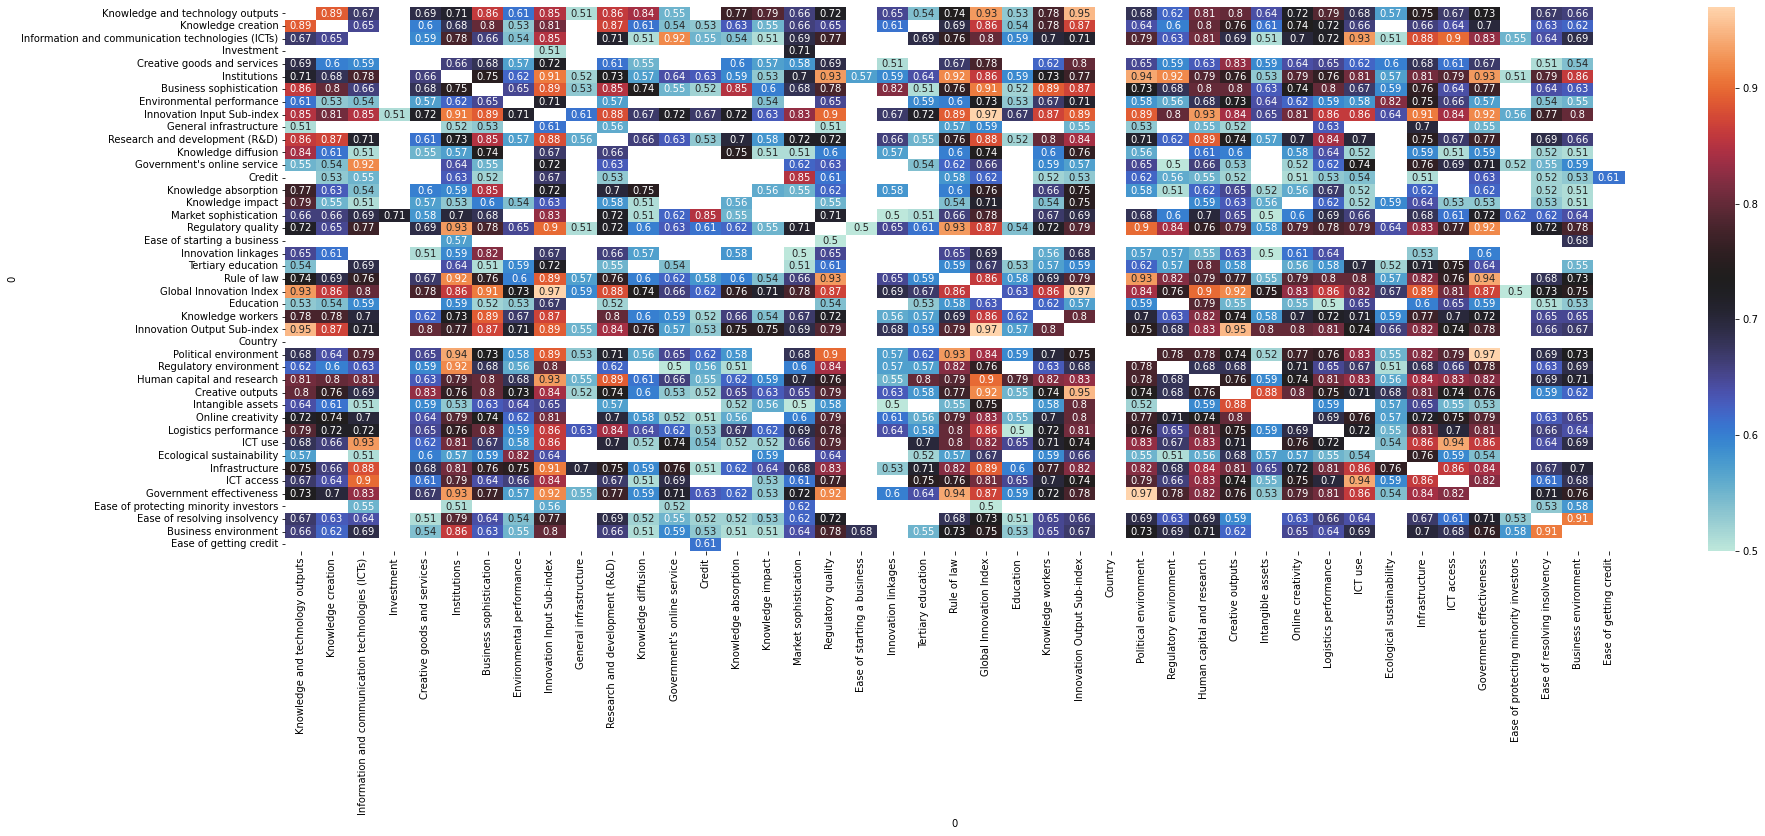

In [97]:
#Creamos la matriz de correlacion
corr_m = df.corr().round(2)
#Visualizamos nuestra matriz en un heatmap
#Valores rojos son cercanos a 1, azules cercanos a -1 y negros a 0
#Los filtramos de modo que sólo se muestren aquellos mayores a .50 0 menores a -.50 de correlación
corr_m = corr_m[((corr_m >= .5) | (corr_m <= -.5)) & (corr_m !=1.000)]
plt.figure(figsize=(30,10))
sns.color_palette("cubehelix", as_cmap=True)
sns.heatmap(data=corr_m, annot=True, cmap = "icefire")

1. **¿Qué se observa en la matriz de correlación?**  
A partir de la matriz de correlación, identificamos que están estrechamente correlacionados entre sí. Se encuentran que las columnas de los índices tienen una obvia correlación, mientras que columnas como instituciones, efectividad de gobierno tienen mayor cantidad de altas correlaciones con los demás datos.

2. **¿Qué predictor tiene menos correlación con los demás?**  
La facilidad de empezar una empresa, indicando que aunque haya innovación, el empezar una empresa sigue siendo algo muy incierto y no realmente lo que determina innovación o no. Por otro lado se tiene a la inversión, que tiene sentido de no estar fuertemente correlacionado al ver que hay muchas áreas en las que invertir, pero se ve que influyen directamente sobre el mercado.

3. **¿Qué variables se correlacionan más con la puntuación en ITC?**  
Para la variable en la que nos enfocaremos, que es el nivel de ITC (tecnologías de comunicación), encontramos que el subíndice input de innovación está fuertemente correlacionado, con un .85. El servicio online del gobierno con .92, el uso de tecnologías con .93, infraestructura con .88, acceso a ITCs con .9, efectividad de gobierno con .83. La mayoría de estas correlaciones es muy obvia, ya que directamente se invierte en ITCs. De estos predictores, resulta interesante cómo la organización del gobierno se destaca.  
Pasando de resultados altos, las siguientes variables con buena correlación son las puntuaciones en instituciones con .78, research and development con .71, regulatory quality con .77, aplicación de leyes con .76, trabajadores con conocimiento con .7, ambiente político con .79, .81 con human capital and research, rendimiento de logísticas con 0.72. Nos deja ver que igualmente van muy de la mano esas variables, de nuevo recalcando variables de organización gubernamental.



## 2. Data Preprocessing

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Para simplificar los siguientes pasos, creamos una función que incluye el 2.5, 3, 4, 5, 6
# Xarray = Array de predictores, Y = Valores a predecir
# plot = binario para graficar o no, Xnames = Nombres de predictores, Yname = Nombre de y
def trainingTestingA(Xarray, Y, plot, Xnames, RNames, model):
    for X in range(len(Xarray)):
        
        #---------2.5 Data Partitions (Test/Training)---------------
        # Partimos los datos de training y test en 70% y 30%
        # Asignamos un valor a random_state para asegurar que haya consistencia
        X_train, X_test, Y_train, Y_test = train_test_split(Xarray[X], Y, test_size = 0.3, random_state=7)

        #---------4 Model training-----------
        model.fit(X_train, Y_train)

        #---------5 Model testing-----------
        # model evaluation for training set
        y_train_predict = model.predict(X_train)
        # model evaluation for testing set
        y_test_predict = model.predict(X_test)

        #---------6 Results Visualization-----------
        # R2 and RMSE calulations of model from train data
        rmse_Tr = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
        r2_Tr = r2_score(Y_train, y_train_predict)

        # R2 and RMSE calulations of model from test data
        rmse_T = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
        r2_T = r2_score(Y_test, y_test_predict)

        print("Model Performance for " + Xnames[X] + ": Model " + RNames)

        data = {"RMSE": [rmse_Tr,rmse_T], "R2": [r2_Tr,r2_T]}
        pdf = pd.DataFrame(data, index = ["Training Set","Testing Set"])
        display(pdf)

        if (plot):
            X_test_array = np.asarray(X_test)
            X_train_array = np.asarray(X_train)
            y_test_array = np.asarray(y_test_predict)
            y_train_array = np.asarray(y_train_predict)
 
            plt.figure(figsize=(4, 4))
            try: 
                # Grafica scatter sólo para predictores de 1 variable
                plt.scatter(Xarray[X], Y, label = "Data", alpha=0.2)
            except:
                pass

            plt.plot(X_test_array,y_test_array , label="Training", color = "purple")
            plt.plot(X_train_array,y_train_array, label="Test", color = "orange")
            
            plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0))
            plt.xlabel(Xnames[X])
            
            plt.show()

#### 2.4 (Empirical) Dimension Reduction

In [99]:
# Vemos que en general las variables del dataset están fuertemente relacionadas, por lo que probamos usando todas las variables
# Cabe mencionar que podrían realizarse más pruebas con combinaciones entre estos 41 predictores y obtener resultados similares
X_All = df.drop(['Country', 'Information and communication technologies (ICTs)'], axis=1)
# Prediciremos el nivel tecnológico según todas estas variables
Y = df['Information and communication technologies (ICTs)']

In [100]:
XMvars = [X_All]
XMvarsN = ["All Variables"]

## 3. Model Creation

### Model #1 DecisionTreeClassifier

In [101]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=0, max_depth = 2000)
DTR2 = DecisionTreeRegressor(random_state=0, max_depth = 3000)

### Model #2 Random Forest

In [102]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=1000)
RFR2 = RandomForestRegressor(n_estimators= 400, bootstrap= False)

### Model #3 Support Vector Machine (SVC)

In [103]:
from sklearn.svm import SVR

SVRM = SVR(C = 100.0 / 300, kernel = 'linear')
SVRM2 = SVR(C = 25.0 / 300, kernel = 'poly')

### Model #4 Neural Networks

In [104]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(hidden_layer_sizes=(64,64,64,64))
MLP2 = MLPRegressor(hidden_layer_sizes=(128,128,128,128))

## 6. Visualization of Results

### Model #1 DecisionTreeClassifier

In [105]:
trainingTestingA(XMvars, Y, 0, XMvarsN, "DTR", DTR)
trainingTestingA(XMvars, Y, 0, XMvarsN, "DTR2", DTR2)

Model Performance for All Variables: Model DTR


,RMSE,R2
Training Set,0.00000,1.000000
Testing Set,3.89976,0.962984


Model Performance for All Variables: Model DTR2


,RMSE,R2
Training Set,0.00000,1.000000
Testing Set,3.89976,0.962984


### Model #2 Random Forest

In [106]:
trainingTestingA(XMvars, Y, 0, XMvarsN, "RFR", RFR)
trainingTestingA(XMvars, Y, 0, XMvarsN, "RFR2", RFR2)

Model Performance for All Variables: Model RFR


,RMSE,R2
Training Set,0.965537,0.997818
Testing Set,2.257545,0.987595


Model Performance for All Variables: Model RFR2


,RMSE,R2
Training Set,3.338759e-13,1.000000
Testing Set,3.672937e+00,0.967165


### Model #3 Support Vector Machine (SVC)

In [107]:
trainingTestingA(XMvars, Y, 0, XMvarsN, "SVRM", SVRM)
trainingTestingA(XMvars, Y, 0, XMvarsN, "SVRM2", SVRM2)

Model Performance for All Variables: Model SVRM


,RMSE,R2
Training Set,0.094905,0.999979
Testing Set,0.101621,0.999975


Model Performance for All Variables: Model SVRM2


,RMSE,R2
Training Set,5.681197,0.924466
Testing Set,5.008356,0.938947


### Model #4 Neural Networks

In [108]:
trainingTestingA(XMvars, Y, 0, XMvarsN, "MLP", MLP)
trainingTestingA(XMvars, Y, 0, XMvarsN, "MLP2", MLP2)

Model Performance for All Variables: Model MLP


D:\Programs\Code\anaconda3\envs\DeepEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,RMSE,R2
Training Set,1.172507,0.996783
Testing Set,1.771431,0.992362


Model Performance for All Variables: Model MLP2


,RMSE,R2
Training Set,1.043214,0.997453
Testing Set,1.962263,0.990628


## Preguntas

### Generales

1. **¿Cuál es el problema que se quiere resolver?**  
La tecnología se vuelve cada vez más relevante en nuestro mundo, por lo que es importante que los países estén dispuestos a mejorar partes de sus áreas para conseguir lograr una buena puntuación en innovación, de manera que las oportunidades de trabajo, estilo de vida y bienestar mejoren para sus ciudadanos. El problema consiste en identificar en qué se debería mayormente invertir.

2. **¿Qué datos son necesarios y están disponibles para resolver el problema? ¿Existe un data set que se pueda utilizar?¿Es factible generar y construir un data set?**  
Hay muchos datos en internet que tienen relación con la innovación y tecnología, aunque encontrar un dataset apropiado puede ser difícil debido a la falta de columnas o datos muy resumidos. Por eso construimos un dataset a partir de los csv que ofrece Global Innovation Index, rescatando el mayor número de columnas con datos concordantes entre años.

3. **¿Qué tipos de análisis espera realizar con los datos?**  
Se espera realizar un análisis de regresión.

4. **¿Qué resultados se espera tener? ¿Cuál es el rendimiento mínimo que considera útil para su modelo?**   
Se espera tener buenos resultados que den más del 80% e identificar principales predictores.

### Específicas

4. **¿Cuál país es el que tiene puntuación más baja en ITC?**

In [111]:
# Obtenemos el town cuyo índice sea el mínimo
cmin = df.loc[df['Information and communication technologies (ICTs)'].idxmin()]['Country']
Countries[int(cmin)]

'Namibia'

In [112]:
# Obtenemos todos los registros con Namibia
df.loc[df['Country'] == 127.0]

,Knowledge and technology outputs,Knowledge creation,Information and communication technologies (ICTs),Investment,Creative goods and services,Institutions,Business sophistication,Environmental performance,Innovation Input Sub-index,General infrastructure,...,Logistics performance,ICT use,Ecological sustainability,Infrastructure,ICT access,Government effectiveness,Ease of protecting minority investors,Ease of resolving insolvency,Business environment,Ease of getting credit
327,19.7,3.2,9.4,40.0,10.2,49.2,30.6,37.5,31.2,49.9,...,23.1,1.4,23.1,27.5,20.4,26.6,40.0,40.4,58.9,30.0
586,10.4,7.3,53.6,58.3,4.0,49.8,32.8,31.4,36.7,55.4,...,21.0,25.5,17.6,42.2,42.0,25.2,58.3,47.2,65.8,50.0
718,12.8,8.6,54.2,58.0,4.0,49.9,27.5,32.7,36.2,44.8,...,20.8,28.7,15.1,38.0,41.1,30.0,58.0,47.2,64.4,75.0
850,9.4,7.9,46.0,31.5,2.3,61.9,17.0,40.2,36.2,9.7,...,0.0,35.8,26.0,27.2,46.0,52.8,56.0,36.9,54.6,60.0


5. **¿Cuál país es el que tiene puntuación más alta en ITC?**

In [115]:
# Obtenemos el town cuyo índice sea el mínimo
cmax = df.loc[df['Information and communication technologies (ICTs)'].idxmax()]['Country']
Countries[int(cmax)]

'Republic of Korea'

In [116]:
# Obtenemos todos los registros con Corea
df.loc[df['Country'] == cmax]

,Knowledge and technology outputs,Knowledge creation,Information and communication technologies (ICTs),Investment,Creative goods and services,Institutions,Business sophistication,Environmental performance,Innovation Input Sub-index,General infrastructure,...,Logistics performance,ICT use,Ecological sustainability,Infrastructure,ICT access,Government effectiveness,Ease of protecting minority investors,Ease of resolving insolvency,Business environment,Ease of getting credit
867,54.5,66.1,94.8,31.5,32.4,79.5,60.1,66.5,65.2,49.4,...,72.7,89.1,33.4,59.2,90.0,81.2,74.0,82.9,88.1,65.0


## Bibliography

Dataset obtenido de:<hr>
Global Innovation Index. (2022). Analysis. Recuperado de: https://www.globalinnovationindex.org/analysis-indicator